In [1]:
#inbuilt packages 
import os
from PIL import Image
from tqdm import tqdm

#datascience packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#PyTorch related packages
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [8]:
# (Get-ChildItem data/test).Count
# ls data/test | Measure-Object -Line

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Hyper Parameters

In [2]:
batch_size = 16
model_input_size = 224  

In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Data Loader

In [11]:

class FaceKeyPointData(Dataset):
    def __init__(self, csv_path, split, device=torch.device('cpu')):
        super(FaceKeyPointData).__init__()
        self.split = split
        self.csv_path = csv_path
        self.df = pd.read_csv(csv_path)
        self.normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
        self.device = device
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, index):
        img, original_size = self.get_img(index)
        key_points = self.get_key_points(index=index, original_size=original_size)
        return img, key_points
    
    def get_img(self, index):
        img_path = os.path.join(os.path.dirname(os.getcwd()), 'data', self.split, str(self.df.iloc[index, 0]))
        img = Image.open(img_path).convert('RGB')
        original_size = img.size
        img_resized = np.asarray(img.resize((model_input_size, model_input_size))) / 255.0
        img_resized = torch.tensor(img_resized).permute(2, 0, 1)
        img_normalized = self.normalize(img_resized)
        return img_normalized.to(self.device), original_size
    
    def get_key_points(self, index, original_size):
        kp = self.df.iloc[index, 1:].to_numpy().astype(np.float32)
        kp_x = kp[0::2] / original_size[0]
        kp_y = kp[1::2] / original_size[1]
        kp = np.concatenate([kp_x, kp_y])
        return torch.tensor(kp).to(self.device)
    
    def load_img(self, index):
        img_path = os.path.join(os.path.dirname(os.getcwd()), 'data', self.split, str(self.df.iloc[index, 0]))
        img = Image.open(img_path).convert('RGB')
        img_resized = np.asarray(img.resize((model_input_size, model_input_size))) / 255.0
        return img_resized
     
        
training_data_path=r'D:\Code\DeepLearning\phase2\facialkeypoints\data\training_frames_keypoints.csv'  

training_data = FaceKeyPointData(training_data_path,'training',device=device)
training_data[0]
# len(training_data)   

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-0.4739, -0.4397, -0.4568,  ..., -0.1314, -0.1314, -0.1486],
          [-0.4739, -0.4397, -0.4054,  ..., -0.1314, -0.1314, -0.1486],
          [-0.4568, -0.4054, -0.3712,  ..., -0.1143, -0.1143, -0.1314]],
 
         [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          ...,
          [-0.2850, -0.2500, -0.2675,  ..., -0.0049, -0.0049, -0.0224],
          [-0.2850, -0.2500, -0.2150,  ..., -0.0049, -0.0049, -0.0224],
          [-0.2675, -0.2150, -0.1800,  ...,  0.0126,  0.0126, -0.0049]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

batch , channel, width length

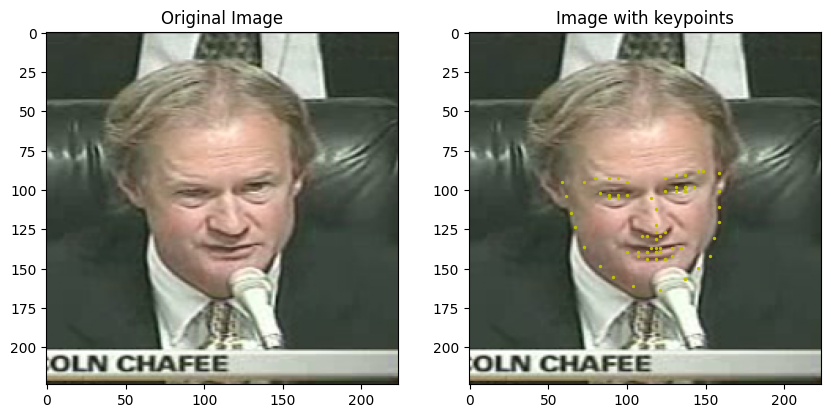

In [21]:
img_index=1
img=training_data.load_img(img_index)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original Image')

plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Image with keypoints')
plt.imshow(img)

img_tensor, key_points=training_data[img_index]

key_points = key_points.cpu().numpy()

plt.scatter(key_points[:68]* model_input_size, key_points[68:]*model_input_size,c='y',s=2)

In [22]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
